# Simple Linear Regression

In this example we will consider sales based on 'TV' marketing budget.

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import pandas as pd

In [ ]:
pd.read_csv??

In [39]:
# Reading csv file
# data = pd.read_csv('Advertising.csv')
print(type(data))
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()
advertising = data

# data.head()
advertising.head()

<class 'pandas.core.frame.DataFrame'>


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Now, let's check the structure of the advertising dataset.

In [40]:
# Display the first 5 rows
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [41]:
# Display the last 5 rows
advertising.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [42]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [43]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 4)

In [44]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualising Data Using Plot

<Axes: xlabel='TV', ylabel='sales'>

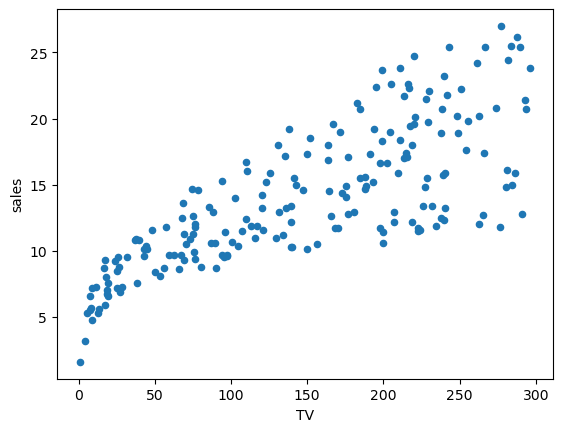

In [45]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='sales',kind='scatter')
# addline

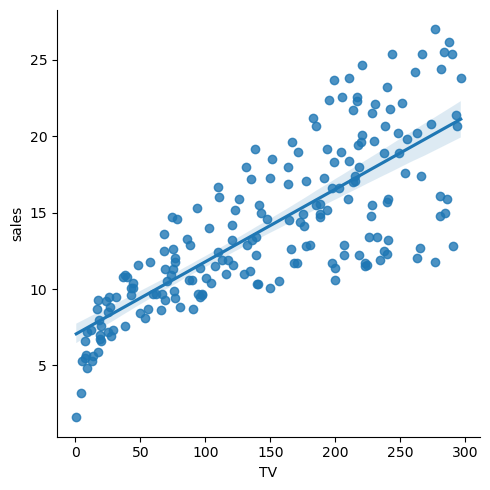

In [46]:
import seaborn as sns
sns.lmplot(x='TV', y='sales', data=advertising)

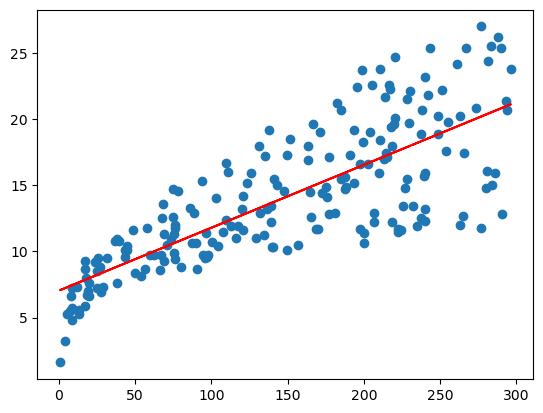

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = advertising['TV']
y = advertising['sales']
plt.scatter(X, y)

z = np.polyfit(X, y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r-")

plt.show()

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows:

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [64]:
# Putting feature variable to X
X = advertising.drop('sales', axis = 1)

# Print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [65]:
# Putting response variable to y
y = advertising['sales']

# Print the first 5 rows
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## Splitting Data into Training and Testing Sets

In [66]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=13)



In [67]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [68]:
train_test_split
#Press Tab+Shift to read the documentation

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [69]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [70]:
#It is a general convention in scikit-learn that observations are rows, while features are columns.
#This is needed only when you are using a single feature; in this case, 'TV'.

# import numpy as np
# #Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
# X_train = X_train[:, np.newaxis]
# X_test = X_test[:, np.newaxis]

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [72]:
# X = advertising[['TV']]
# y = advertising['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


## Performing Linear Regression

In [73]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Coefficients Calculation

In [74]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

2.880255286331323
[0.04391531 0.20027962 0.00184368]


$y = 7.31 + 0.0458 \times TV $<br>

Now, let's use this equation to predict our sales.

## Predictions

In [75]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [76]:
type(y_pred)

numpy.ndarray

#### Computing RMSE and R^2 Values
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model


In [ ]:
y_test.shape # cheek the shape to generate the index for plot

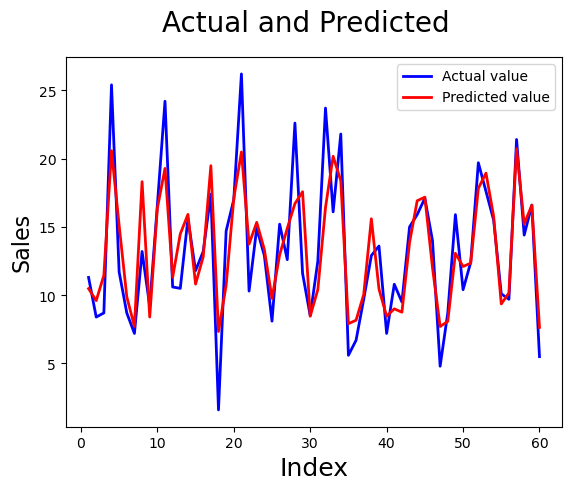

In [26]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label
plt.legend(['Actual value', 'Predicted value'])

Text(0, 0.5, 'ytest-ypred')

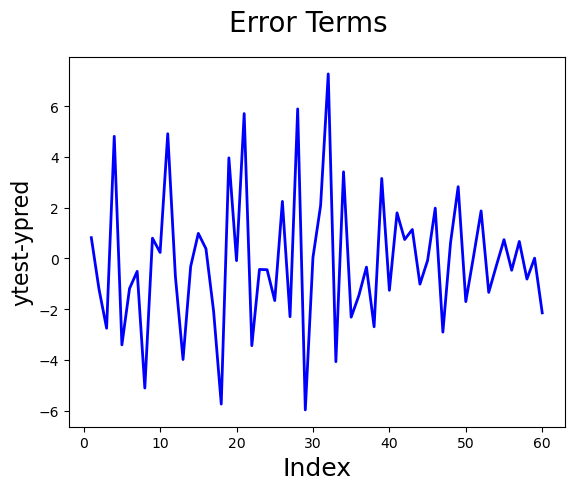

In [27]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [32]:
r_squared = r2_score(y_test, y_pred)

In [33]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


In [ ]:
# this mse =7.9 means that this model is not able to match the 7.9 percent of the values
# r2 means that your model is 72% is accurate on test data .

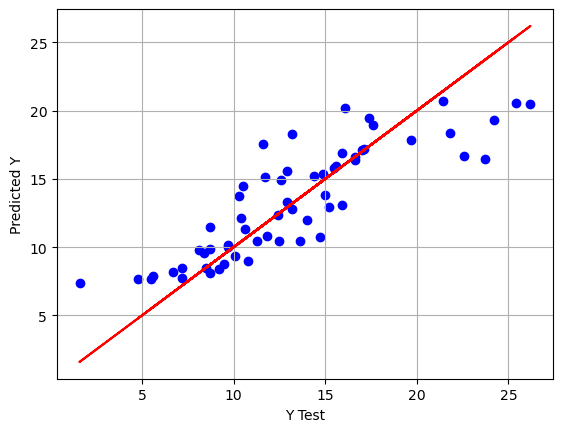

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
# plt.line(y_test, y_Test, c = 'red')
plt.plot(y_test,y_test,"r-")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

In [ ]:
import seaborn as sns
sns.lmplot(x='TV', y='sales', data=advertising)

In [77]:
lr.score(X,y)

0.8948552452796075

In [78]:
lr.score(X_train, y_train)

0.9065727532450596

In [79]:
lr.score(X_test, y_test)

0.8649018906637792

**Source:** https://www.kaggle.com/code/devzohaib/simple-linear-regression